In [1]:
import numpy as np
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

### Task 1: (30% of credit)
#### (1) Consder the dataset 1 below, with two-dimensional observations X classified into 2 categories using vector Y. As you can see from the plot the dataset is linearly separable. Train a linear SVM (setting C=100000 just to emphasize that no slack variables are admitted). 
#### a. Report the separating hyperplane (line).
#### b. Calculate the margin.
#### c. List the support vectors.

#### (2) Add the separating line to the plot, visualize the margin and mark the support vectors.

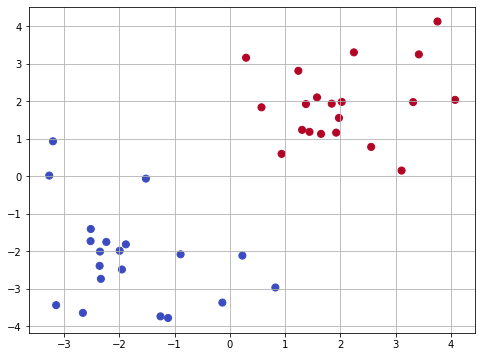

In [2]:
#Data
data1=pd.read_csv('dataset1.csv')
X=data1.iloc[:,:2]
Y=data1.iloc[:,2]
rcParams['figure.figsize'] = 8, 6
plt.grid()
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));

#### Solution:

1.
(a).

In [3]:
from sklearn import svm
clf = svm.SVC(kernel = 'linear', C=100000)
clf.fit(X,Y)

SVC(C=100000, kernel='linear')

In [4]:
print(clf.coef_)
print(clf.intercept_)

[[0.66329036 0.56359437]]
[0.04319974]


Therefore the separating line is given by:

                                         0.6633𝑥+0.5636𝑦+0.0432=0

(b). 

In [5]:
margin = 1/np.sqrt(np.sum(clf.coef_**2))
margin

1.1488996752138216

(c).

In [6]:
w = clf.coef_[0]
a = -w[0]/w[1]

xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

Therefore the Support vectors are given by:

                            0.6633𝑥+0.5636𝑦+1.0432=0
 
                            0.6633𝑥+0.5636𝑦−0.568=0

2.Plot

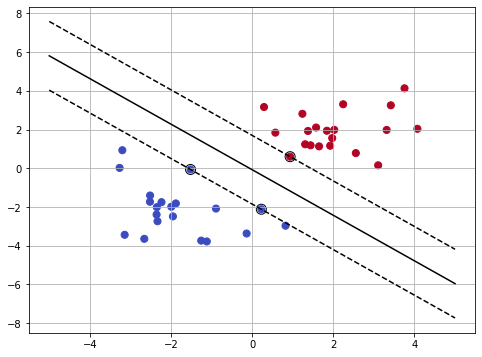

In [7]:
plt.figure(1, figsize=(8, 6))
plt.grid()
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')

### Task 2 (30% of credit)

#### (1)Train SVM with soft margin on the training subset of the dataset 2 below. First try C=0.01, and visualize the seperation over the training set. Report the in-sample and out-of-sample accuracy acheived by SVM over the training and test sets.

#### (2) Try various regulatization constants C from the sequence below and use the validation subset in order to evaluate perfomance of the classifier. Plot the validation accuracy vs log(C).  
C=[math.exp(i) for i in np.linspace(-10,5,200)]   

#### (3) Select optimal C based on the validation accuracy above and report new out-of-sample accuracy of the classifier over the test set while using this optimal C.


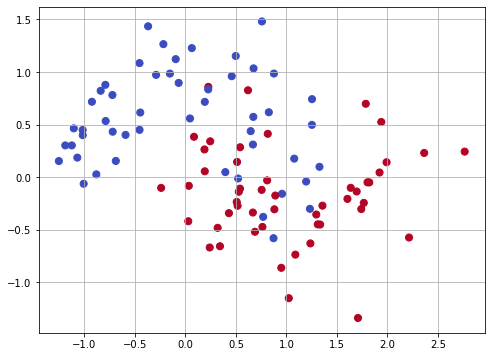

In [8]:
#Data
data2=pd.read_csv('dataset2.csv')
X=data2.iloc[:,:2]
Y=data2.iloc[:,2]
plt.grid()
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));

#Generate training(X_train, Y_train) and testing data(X_test,Y_test) sets from Data(X,Y) for out of sample test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.33, random_state=1)

#Generate validation(X_vali, Y_vali) and testing data(X_train_1,Y_train_1) sets from training data(X_train,Y_train)
#for training arguments
X_train_1,X_vali,Y_train_1,Y_vali = train_test_split(
    X_train, Y_train, test_size=0.33, random_state=99)

### Solutions:

(1)

In [9]:
from sklearn import svm
clf = svm.SVC(kernel = 'linear', C = 0.01)
clf.fit(X_train,Y_train)

SVC(C=0.01, kernel='linear')

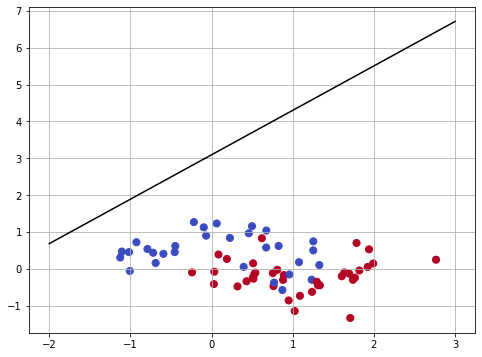

In [10]:
w = clf.coef_[0]
a = -w[0]/w[1]
xx = np.linspace(-2, 3)
yy = a * xx - (clf.intercept_[0]) / w[1]

plt.figure(1, figsize=(8, 6))
plt.scatter(X_train.iloc[:,0], X_train.iloc[:,1], s=50, c=Y_train, cmap=plt.cm.get_cmap('coolwarm', 2));
plt.plot(xx, yy, 'k-')
plt.grid()

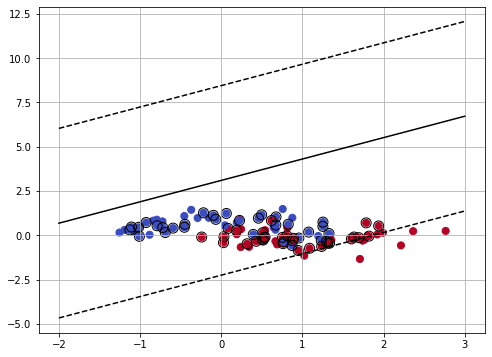

In [11]:
margin = 1/np.sqrt(np.sum(clf.coef_**2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

plt.figure(1, figsize=(8, 6))
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.grid()

In [12]:
from sklearn.metrics import accuracy_score
acc = []

for i in [[X_train, Y_train], [X_test, Y_test]]:
    acc.append(accuracy_score(i[1],clf.predict(i[0])))

In [13]:
pd.DataFrame(acc, index = ['In-Sample', 'Out-of-Sample'], columns = ['Accuracy'])

,Accuracy
In-Sample,0.552239
Out-of-Sample,0.393939


(2)

#### (For this question people could have different C. Any C that is bigger than 1, is a safe choice. But the corresponding accuracy should be around 0.78.) 

In [14]:
import math
C=[math.exp(i) for i in np.linspace(-10,5,200)]
acc_C = []

for i in C:
    clf = svm.SVC(kernel = 'linear', C=i)
    clf.fit(X_train_1,Y_train_1)
    acc_C.append(accuracy_score(Y_vali,clf.predict(X_vali)))

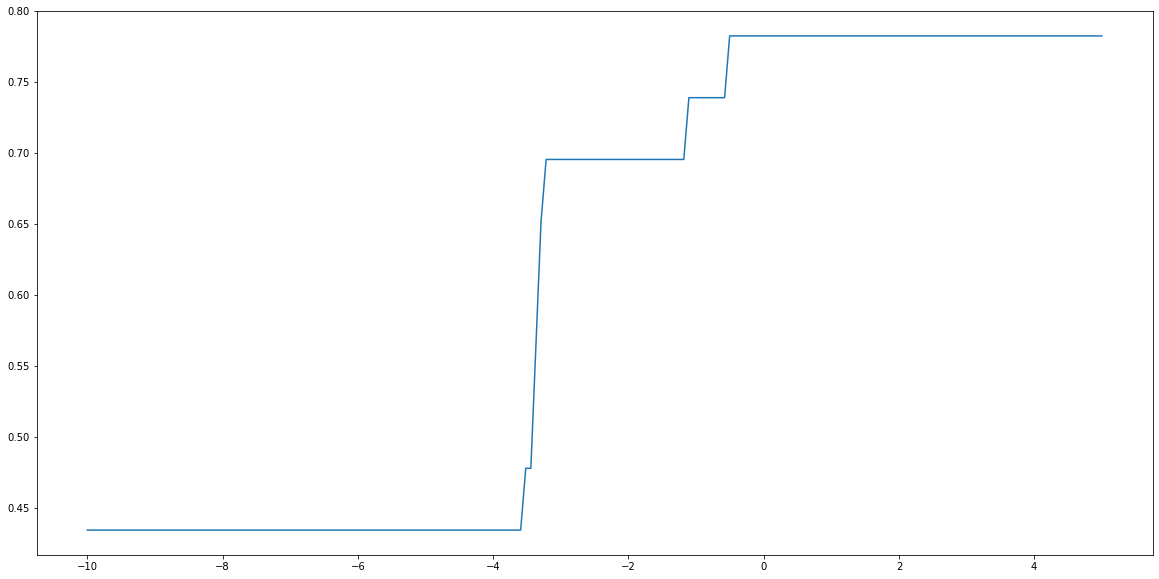

In [15]:
acc_C = pd.DataFrame(acc_C, index = C, columns = ['Accuracy'])

plt.figure(1, figsize = (20,10))
plt.plot(np.log(acc_C.index), acc_C['Accuracy'])

(3)

#### (The answer could be different for people who have different optimal C. However it should be around 80 percent.)

In [16]:
f = acc_C[acc_C['Accuracy'] > 0.78]

f[0:10]

,Accuracy
0.605009,0.782609
0.652375,0.782609
0.703450,0.782609
0.758523,0.782609
0.817908,0.782609
0.881943,0.782609
0.950990,0.782609
1.025444,0.782609
1.105726,0.782609
1.192294,0.782609


In [17]:
C = acc_C.index[len(acc_C['Accuracy']) - 67]

clf = svm.SVC(kernel = 'linear', C = C)
clf.fit(X_train,Y_train)

acc_o = (accuracy_score(Y_test,clf.predict(X_test)))
acc_o

0.8484848484848485

### Task 3 (40% of credit)

#### (1) Train polynomial SVM over the training subset of the dataset 3 provided below. Use the default arguments, and plot the seperation result. Report classification accuracy for the training and test sets.

#### (2) Use validation subset in order to pick the optimal parameters for the polynomial model.

(a) Try the degrees 1,2,3,4. For each degree, consider variety of regularization constants from the range

C=[math.exp(i) for i in np.linspace(-10,2*degree,200)]

in order to evaluate the classifier performance over the validation set.

(b) Plot graph "Accuracy vs log(C)" for each degree, and pick optimal degree and regularization constant C based on these graphs. Report your optimal degree and C.

(c) Use optimal degree and regularization constant C to compute and report the final out-of-sample accuracy of the best classification model selected. 


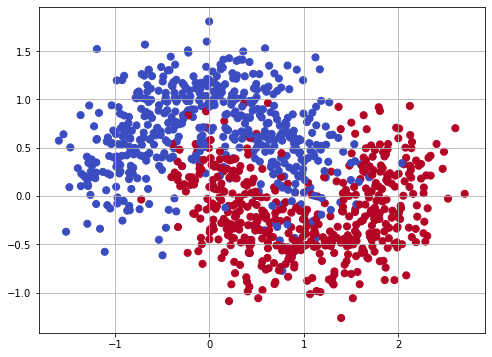

In [18]:
#Data 
data3=pd.read_csv('dataset3.csv')
X=data3.iloc[:,:2]
Y=data3.iloc[:,2]
plt.grid()
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));

#Generate training(X_train, Y_train) and testing data(X_test,Y_test) sets from Data(X,Y) for out of sample test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.33, random_state=1)

#Generate validation(X_vali, Y_vali) and testing data(X_train_1,Y_train_1) sets from training data(X_train,Y_train)
#for training arguments(degree and C)
X_train_1,X_vali,Y_train_1,Y_vali = train_test_split(
    X_train, Y_train, test_size=0.33, random_state=99)

### Solutions

(1)

In [19]:
from sklearn import svm
clf = svm.SVC(kernel = 'poly')
clf.fit(X_train,Y_train)

SVC(kernel='poly')

In [20]:
xx = np.linspace(-2,3)
yy = np.linspace(-2,2)

In [21]:
h = .02
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
zz = clf.predict(np.c_[xx.ravel(), yy.ravel()])
zz = zz.reshape(xx.shape)

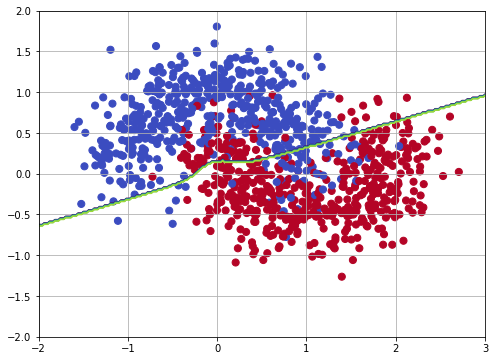

In [22]:
plt.figure(1, figsize=(8, 6))
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2))
plt.contour(xx,yy,zz)
plt.xlim([-2,3])
plt.ylim([-2,2])
plt.grid()

In [23]:
acc = []
for i in [[X_train, Y_train], [X_test, Y_test]]:
    acc.append(accuracy_score(i[1],clf.predict(i[0])))
    
pd.DataFrame(acc, index = ['Training set', 'Testing set'], columns = ['Accuracy'])

,Accuracy
Training set,0.856716
Testing set,0.866667


(2)
a.

#### Look carefully at the plot. Here the accuracy goes down when we increase log(C). If you choose optimal C in the end of the period when C reaches max as we did in class, you could have problems (might not, no garuantee). So you might have your own way of picking the optimal C, but you should have a similar OS result in next question. 

In [24]:
degree = [1,2,3,4]

acc = np.empty([len(degree),200])

for i in range(len(degree)):
    C=[math.exp(i) for i in np.linspace(-10,2*degree[i],200)]
    for j in range(len(C)):
        clf = svm.SVC(kernel = 'poly', degree = degree[i], C = C[j])
        clf.fit(X_train_1, Y_train_1)
        acc[i,j] = accuracy_score(Y_vali,clf.predict(X_vali))

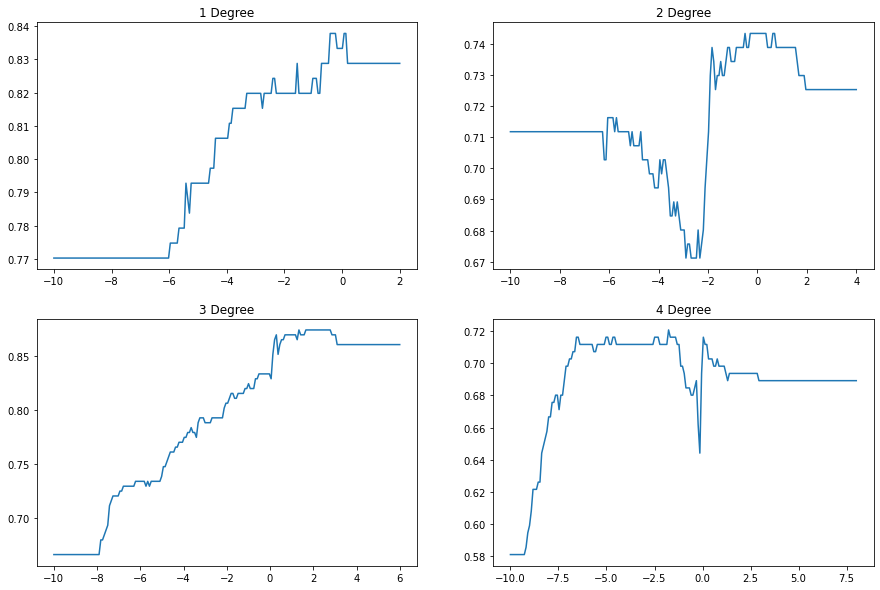

In [25]:
fig, ax = plt.subplots(2,2, figsize =(15,10))

for n in degree:
    plt.subplot(2,2,n)
    C=[i for i in np.linspace(-10,2*n,200)]
    plt.plot(C,acc[n-1,:])
    plt.title(str(n) + ' Degree')

Degree 3 achieves the highest possible accuracy among degrees 1,2,3 and 4. C has to be chosen such that we achieve the highest degree in C

In [26]:
m = np.max(acc[2,:])
idx = [i for i, j in enumerate(acc[2,:]) if j == m]

In [27]:
C = [math.exp(i) for i in np.linspace(-10,2*3,200)]
c = C[idx[0]]
c

3.806398311933802

The optimal degree is 3 and the optimal C is 3.8064

(3)

In [28]:
clf = svm.SVC(kernel = 'poly', degree = 3, C = c)
clf.fit(X_train, Y_train)

SVC(C=3.806398311933802, kernel='poly')

In [29]:
h = .02
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
zz = clf.predict(np.c_[xx.ravel(), yy.ravel()])
zz = zz.reshape(xx.shape)

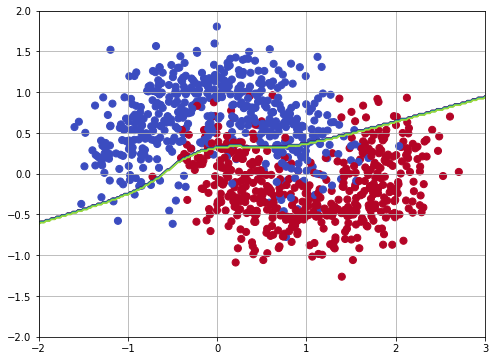

In [30]:
plt.figure(1, figsize=(8, 6))
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2))
plt.contour(xx,yy,zz)
plt.xlim([-2,3])
plt.ylim([-2,2])
plt.grid()

In [31]:
accuracy_score(Y_test,clf.predict(X_test))

0.8909090909090909

Hence, the final out of sample accuracy score is 89.09%